In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_pdde = pd.read_csv('LPOINT_BIG_COMP_02_PDDE.csv')

In [3]:
df4 = pd.read_csv('LPOINT_BIG_COMP_04_PD_CLAC.csv')

In [4]:
df = pd.merge(df_pdde, df4, how='left', on='pd_c')

In [5]:
df_dbscan_ = pd.read_csv('out_off_34.csv')

In [6]:
df_dbscan_

,cust,DBSCAN_outlier,off_or_not
0,M000986912,0,0
1,M001086020,0,0
2,M001248380,0,0
3,M001332751,0,0
4,M001353506,0,0
...,...,...,...
24288,M999441814,0,1
24289,M999468256,0,1
24290,M999492154,0,1
24291,M999673157,0,1


In [7]:
df_dbscan_=df_dbscan_.drop('DBSCAN_outlier', axis=1)
df_dbscan_

,cust,off_or_not
0,M000986912,0
1,M001086020,0
2,M001248380,0
3,M001332751,0
4,M001353506,0
...,...,...
24288,M999441814,1
24289,M999468256,1
24290,M999492154,1
24291,M999673157,1


In [8]:
df_merged = pd.merge(df, df_dbscan_, how='right', on='cust')
df_merged

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm,off_or_not
0,M000986912,A01025272082,1,A01,A010037,PD1689,20210124,16,13300.0,1,디저트,테넌트/음식점,식당,0
1,M000986912,A01044698501,1,A01,A010047,PD1699,20210210,11,7000.0,1,푸드코트컨세션,테넌트/음식점,푸드코트,0
2,M000986912,A01075777561,1,A01,A010047,PD1842,20210304,12,4000.0,1,바디케어세트,퍼스널케어,바디케어,0
3,M000986912,A01075883987,1,A01,A010047,PD1690,20210304,13,2500.0,1,베이커리,테넌트/음식점,식당,0
4,M000986912,A01075901880,1,A01,A010047,PD0290,20210304,13,19800.0,1,남성티셔츠,남성의류,남성의류상의,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121228,M999849895,A04023751558,1,A04,A042834,PD0417,20210403,6,15500.0,1,모바일배터리/충전기,모바일,모바일액세서리,1
3121229,M999849895,A04023751558,1,A04,A042834,PD0240,20210403,6,2400.0,2,바초콜릿,과자,초콜릿,1
3121230,M999849895,A04023751558,1,A04,A042834,PD1165,20210403,6,2300.0,1,스포츠음료,음료,기능성음료,1
3121231,M999849895,A04039822990,1,A04,A040178,PD0080,20210519,12,7400.0,1,안전상비의약외품,건강용품,일반의약외품,1


# OnOff

In [9]:
df_onoff = df_merged[df_merged['off_or_not']==0]

In [10]:
df_onoff

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm,off_or_not
0,M000986912,A01025272082,1,A01,A010037,PD1689,20210124,16,13300.0,1,디저트,테넌트/음식점,식당,0
1,M000986912,A01044698501,1,A01,A010047,PD1699,20210210,11,7000.0,1,푸드코트컨세션,테넌트/음식점,푸드코트,0
2,M000986912,A01075777561,1,A01,A010047,PD1842,20210304,12,4000.0,1,바디케어세트,퍼스널케어,바디케어,0
3,M000986912,A01075883987,1,A01,A010047,PD1690,20210304,13,2500.0,1,베이커리,테넌트/음식점,식당,0
4,M000986912,A01075901880,1,A01,A010047,PD0290,20210304,13,19800.0,1,남성티셔츠,남성의류,남성의류상의,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273214,M999962961,A05001012161,1,A05,A050039,PD0541,20210313,20,599000.0,1,헤어세팅기,생활/주방가전,이미용가전,0
1273215,M999962961,E06002810292,2,A06,NaN,PD0959,20210113,18,129000.0,1,여성재킷,여성의류,여성의류아우터,0
1273216,M999962961,E06004609359,2,A06,NaN,PD0954,20210122,14,34300.0,1,여성스웨터/풀오버,여성의류,여성의류상의,0
1273217,M999962961,E06025413888,2,A06,NaN,PD0967,20210406,17,89000.0,1,여성바지,여성의류,여성의류하의,0


## 1. pivoting

In [11]:
df_pt = pd.pivot_table(data=df_onoff,
               values='buy_am',
               index='cust',
               columns='clac_hlv_nm',
               aggfunc='sum',
               fill_value=0)

df_pt

clac_hlv_nm,가구,건강식품,건강용품,건해산물,계절가전,공구/안전용품,과일,과자,구기/필드스포츠,기타(비상품),...,축산물,출산/육아용품,침구/수예,커피/차,컴퓨터,테넌트/음식점,패션잡화,퍼스널케어,헬스/피트니스,화장품/뷰티케어
cust,,,,,,,,,,,,,,,,,,,,,
M000986912,0,0,0,0,0,0,48860,11580,0,0,...,93340,1000,0,0,0,50700,0,4000,0,0
M001086020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M001248380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2500,0,0,0,0
M001332751,0,0,101100,72860,0,7900,108280,59150,0,0,...,333695,27600,9900,47960,0,25570,21700,83700,0,158000
M001353506,0,0,0,0,0,0,0,15100,0,250,...,0,0,0,2400,0,0,133000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M999180761,0,0,0,2885,0,0,1300,20300,0,0,...,0,0,0,0,0,145700,0,30000,0,48000
M999268192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6200,0,0,0,0
M999599111,0,17900,0,9980,0,0,9980,7180,0,0,...,135752,0,0,0,0,0,0,0,0,0


## scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_pt)
df_spt = pd.DataFrame(scaler.transform(df_pt), index=df_pt.index, columns=df_pt.columns)
df_spt

clac_hlv_nm,가구,건강식품,건강용품,건해산물,계절가전,공구/안전용품,과일,과자,구기/필드스포츠,기타(비상품),...,축산물,출산/육아용품,침구/수예,커피/차,컴퓨터,테넌트/음식점,패션잡화,퍼스널케어,헬스/피트니스,화장품/뷰티케어
cust,,,,,,,,,,,,,,,,,,,,,
M000986912,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.023296,0.012966,0.0,0.000000,...,0.021926,0.001034,0.000000,0.000000,0.0,0.036763,0.000000,0.002853,0.0,0.000000
M001086020,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
M001248380,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.001813,0.000000,0.000000,0.0,0.000000
M001332751,0.0,0.000000,0.019442,0.094870,0.0,0.016548,0.051628,0.066229,0.0,0.000000,...,0.078387,0.028538,0.003551,0.035447,0.0,0.018541,0.000414,0.059692,0.0,0.018920
M001353506,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.016907,0.0,0.000108,...,0.000000,0.000000,0.000000,0.001774,0.0,0.000000,0.002540,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M999180761,0.0,0.000000,0.000000,0.003757,0.0,0.000000,0.000620,0.022730,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.105649,0.000000,0.021395,0.0,0.005748
M999268192,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.004496,0.000000,0.000000,0.0,0.000000
M999599111,0.0,0.009964,0.000000,0.012995,0.0,0.000000,0.004758,0.008039,0.0,0.000000,...,0.031889,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000


In [13]:
df_spt

clac_hlv_nm,가구,건강식품,건강용품,건해산물,계절가전,공구/안전용품,과일,과자,구기/필드스포츠,기타(비상품),...,축산물,출산/육아용품,침구/수예,커피/차,컴퓨터,테넌트/음식점,패션잡화,퍼스널케어,헬스/피트니스,화장품/뷰티케어
cust,,,,,,,,,,,,,,,,,,,,,
M000986912,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.023296,0.012966,0.0,0.000000,...,0.021926,0.001034,0.000000,0.000000,0.0,0.036763,0.000000,0.002853,0.0,0.000000
M001086020,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
M001248380,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.001813,0.000000,0.000000,0.0,0.000000
M001332751,0.0,0.000000,0.019442,0.094870,0.0,0.016548,0.051628,0.066229,0.0,0.000000,...,0.078387,0.028538,0.003551,0.035447,0.0,0.018541,0.000414,0.059692,0.0,0.018920
M001353506,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.016907,0.0,0.000108,...,0.000000,0.000000,0.000000,0.001774,0.0,0.000000,0.002540,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M999180761,0.0,0.000000,0.000000,0.003757,0.0,0.000000,0.000620,0.022730,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.105649,0.000000,0.021395,0.0,0.005748
M999268192,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.004496,0.000000,0.000000,0.0,0.000000
M999599111,0.0,0.009964,0.000000,0.012995,0.0,0.000000,0.004758,0.008039,0.0,0.000000,...,0.031889,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000


## 3.1 Elbow Point

In [17]:
inertia_arr = []
k_range = range(2, 20)
# rate_of_change = 0

for k in k_range:
    Kmeans = KMeans(n_clusters=k, random_state = 200)
    Kmeans.fit(df_spt)
    inertia = Kmeans.inertia_
    
    print('k: ', k, 'inertia: ', inertia)
    
    inertia_arr.append(inertia)
inertia_arr = np.array(inertia_arr)

k:  2 inertia:  1242.3016824539734
k:  3 inertia:  1170.1535406919338
k:  4 inertia:  1135.4208189108267
k:  5 inertia:  1109.3247630935812
k:  6 inertia:  1086.9507731438446
k:  7 inertia:  1069.2837130572373
k:  8 inertia:  1047.211040353467
k:  9 inertia:  1031.1739716550908
k:  10 inertia:  1018.7877627484787
k:  11 inertia:  997.7119147420306
k:  12 inertia:  984.8443187656779
k:  13 inertia:  970.8216321750259
k:  14 inertia:  962.3958106640879
k:  15 inertia:  943.5523941826783
k:  16 inertia:  929.2943209373375
k:  17 inertia:  914.019890452163
k:  18 inertia:  906.0984045331065
k:  19 inertia:  897.721355686569


In [26]:
def get_inertia(df, k):
    Kmeans = KMeans(n_clusters=k, random_state=200)
    Kmeans.fit(df)
    return Kmeans.inertia_

def get_clusters_k(df):
    k_range = range(2, 20)
    k_result = None

    for k in k_range:
        minus = get_inertia(df, k) - get_inertia(df, k + 1)
        if k == 2:
            minus_before = minus
            minus_rate_max = 0
        else:
            minus_rate = minus_before - minus
#             print('k가 ', k, '일 때, ', k+1, '일때의 inertia와',  k, '일 때의 inertia의 차이는', minus)
#             print('차이: ', minus_rate)
            if minus_rate > minus_rate_max:
                k_result = k
                minus_rate_max = minus_rate
            minus_before = minus

    return k_result

get_clusters_k(df_spt)

k가  3 일 때,  4 일때의 inertia와 3 일 때의 inertia의 차이는 34.7327217811071
차이:  37.415419980932484
k가  4 일 때,  5 일때의 inertia와 4 일 때의 inertia의 차이는 26.096055817245542
차이:  8.63666596386156
k가  5 일 때,  6 일때의 inertia와 5 일 때의 inertia의 차이는 22.373989949736597
차이:  3.7220658675089453
k가  6 일 때,  7 일때의 inertia와 6 일 때의 inertia의 차이는 17.667060086607307
차이:  4.7069298631292895
k가  7 일 때,  8 일때의 inertia와 7 일 때의 inertia의 차이는 22.072672703770195
차이:  -4.4056126171628875
k가  8 일 때,  9 일때의 inertia와 8 일 때의 inertia의 차이는 16.037068698376288
차이:  6.035604005393907
k가  9 일 때,  10 일때의 inertia와 9 일 때의 inertia의 차이는 12.386208906612069
차이:  3.650859791764219
k가  10 일 때,  11 일때의 inertia와 10 일 때의 inertia의 차이는 21.075848006448155
차이:  -8.689639099836086
k가  11 일 때,  12 일때의 inertia와 11 일 때의 inertia의 차이는 12.867595976352618
차이:  8.208252030095537
k가  12 일 때,  13 일때의 inertia와 12 일 때의 inertia의 차이는 14.022686590652029
차이:  -1.1550906142994108
k가  13 일 때,  14 일때의 inertia와 13 일 때의 inertia의 차이는 8.425821510938022
차이:  5.596865079714007
k가  

3

In [ ]:
a=1
b= 33

print('a: ', k)

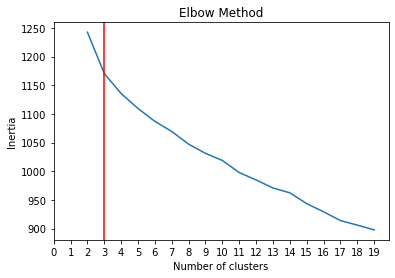

In [25]:
plt.plot(k_range, inertia_arr)

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks([i for i in  range(0,20)])
plt.axvline(3, color='r')
plt.show()

## 3.2 Silhouette Score

In [61]:
# from sklearn.metrics import silhouette_score

# k_range = range(2, 20)
# best_k = -1
# best_silhouette_score = -1

# for k in k_range:
#     Kmeans = KMeans(n_clusters=k, random_state = 200)
#     Kmeans.fit(df_spt)
#     clusters = Kmeans.predict(df_spt)
    
#     score = silhouette_score(df_spt, clusters)
#     print('k: ', k, 'score: ', score)
    
#     if score > best_silhouette_score:
#         best_k = k
#         best_silhouette_score = score
        
# print('best_k: ', best_k, 'best_score: ', best_silhouette_score)

k:  2 score:  0.4828880689212426
k:  3 score:  0.3534716224982821
k:  4 score:  0.3521929805223147
k:  5 score:  0.2724270251673283
k:  6 score:  0.25025129031319954
k:  7 score:  0.3029638810490845
k:  8 score:  0.24532398125454585
k:  9 score:  0.24310035872161895
k:  10 score:  0.24776322848362428
k:  11 score:  0.24597765930152227
k:  12 score:  0.23016832684983873
k:  13 score:  0.21922294068188297
k:  14 score:  0.2227555031072144
k:  15 score:  0.23179582128215798
k:  16 score:  0.22627949028364597
k:  17 score:  0.23387109083482469
k:  18 score:  0.23568134730187937
k:  19 score:  0.20961706268484345
best_k:  2 best_score:  0.4828880689212426


## 4. clustering

In [26]:
Kmeans_ = KMeans(n_clusters=3, random_state = 200)
Kmeans_.fit(df_spt)

KMeans(n_clusters=3, random_state=200)

In [27]:
cluster = Kmeans_.predict(df_spt)
cluster

array([0, 0, 0, ..., 0, 2, 2])

In [28]:
df_spt['cluster'] = cluster
df_spt

clac_hlv_nm,가구,건강식품,건강용품,건해산물,계절가전,공구/안전용품,과일,과자,구기/필드스포츠,기타(비상품),...,출산/육아용품,침구/수예,커피/차,컴퓨터,테넌트/음식점,패션잡화,퍼스널케어,헬스/피트니스,화장품/뷰티케어,cluster
cust,,,,,,,,,,,,,,,,,,,,,
M000986912,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.023296,0.012966,0.0,0.000000,...,0.001034,0.000000,0.000000,0.0,0.036763,0.000000,0.002853,0.0,0.000000,0
M001086020,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0
M001248380,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.001813,0.000000,0.000000,0.0,0.000000,0
M001332751,0.0,0.000000,0.019442,0.094870,0.0,0.016548,0.051628,0.066229,0.0,0.000000,...,0.028538,0.003551,0.035447,0.0,0.018541,0.000414,0.059692,0.0,0.018920,1
M001353506,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.016907,0.0,0.000108,...,0.000000,0.000000,0.001774,0.0,0.000000,0.002540,0.000000,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M999180761,0.0,0.000000,0.000000,0.003757,0.0,0.000000,0.000620,0.022730,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.105649,0.000000,0.021395,0.0,0.005748,0
M999268192,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.004496,0.000000,0.000000,0.0,0.000000,0
M999599111,0.0,0.009964,0.000000,0.012995,0.0,0.000000,0.004758,0.008039,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0


In [29]:
df_spt.value_counts('cluster')

cluster
0    5095
2    2090
1     826
dtype: int64

In [30]:
df_clustered = df_spt.groupby('cluster').sum()
df_clustered

clac_hlv_nm,가구,건강식품,건강용품,건해산물,계절가전,공구/안전용품,과일,과자,구기/필드스포츠,기타(비상품),...,축산물,출산/육아용품,침구/수예,커피/차,컴퓨터,테넌트/음식점,패션잡화,퍼스널케어,헬스/피트니스,화장품/뷰티케어
cluster,,,,,,,,,,,,,,,,,,,,,
0,22.161298,46.249676,10.580682,30.448023,10.160501,17.482805,59.504377,126.604179,20.083103,72.113594,...,36.328173,27.792076,28.310405,24.855256,31.736632,195.213433,43.409437,51.523855,30.820831,46.047493
1,3.842242,16.778992,2.012126,61.041648,1.286824,16.865379,107.884470,150.223778,2.795905,11.678391,...,66.333505,11.672640,7.065972,25.848247,3.220628,50.561555,5.453906,38.100296,5.681513,7.730431
2,9.771587,40.802168,5.069074,68.240079,3.928730,20.792696,127.504335,213.277835,10.176310,49.164436,...,76.303325,26.068595,21.717220,40.941503,11.367316,170.140530,22.367151,61.348281,13.356540,23.541488


## 5. profiling

In [31]:
df_clustered.style.background_gradient(cmap='Blues')

clac_hlv_nm,가구,건강식품,건강용품,건해산물,계절가전,공구/안전용품,과일,과자,구기/필드스포츠,기타(비상품),남성의류,냉동식품,냉장/세탁가전,냉장식품,담배,대용식,모바일,문구/사무용품,병통조림,상품권,생활/렌탈서비스,생활/주방가전,서적/음반/악기,세제/위생,속옷/양말/홈웨어,수산물,스포츠패션,시즌스포츠,식기/조리기구,아웃도어/레저,양곡,여성의류,여행/레저서비스,영상/음향가전,완구,원예/애완,유아동의류,유아식품,유제품,음료,인테리어/조명,자동차용품,조리식품,조미료,주류,주방잡화,채소,청소/세탁/욕실용품,축산물,출산/육아용품,침구/수예,커피/차,컴퓨터,테넌트/음식점,패션잡화,퍼스널케어,헬스/피트니스,화장품/뷰티케어
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,22.161298,46.249676,10.580682,30.448023,10.160501,17.482805,59.504377,126.604179,20.083103,72.113594,62.182538,90.400150,12.981442,105.591283,25.625860,148.167894,61.909052,26.214639,12.178415,27.632048,6.367146,28.471805,19.847234,78.209710,48.089290,67.198321,89.316069,40.499960,37.271645,82.739596,35.407357,64.142565,24.245347,14.600275,42.185163,20.629518,106.015999,10.218726,78.153692,76.873223,19.286590,45.139733,80.633446,87.667074,78.737016,57.347338,82.718209,43.372344,36.328173,27.792076,28.310405,24.855256,31.736632,195.213433,43.409437,51.523855,30.820831,46.047493
1,3.842242,16.778992,2.012126,61.041648,1.286824,16.865379,107.884470,150.223778,2.795905,11.678391,11.076412,203.154975,1.822786,206.169966,4.494080,282.276892,6.336414,25.140683,25.643315,1.421130,2.733972,5.755935,5.516852,159.176952,18.920005,122.728801,16.747226,6.683186,14.276320,12.977042,79.805675,10.804198,1.810947,1.498709,19.034133,13.528270,14.346766,9.680000,162.070648,83.489402,11.574970,30.873297,56.005080,215.046337,65.835598,58.485340,203.305704,37.726067,66.333505,11.672640,7.065972,25.848247,3.220628,50.561555,5.453906,38.100296,5.681513,7.730431
2,9.771587,40.802168,5.069074,68.240079,3.928730,20.792696,127.504335,213.277835,10.176310,49.164436,37.354284,200.896365,4.881496,224.069023,15.128019,335.983265,16.980900,34.653219,22.720353,7.487685,5.101427,13.097863,14.299644,164.809971,40.848198,143.987578,45.501729,30.360459,33.941932,42.412769,86.635839,36.909498,14.656632,5.959125,40.066705,21.017295,58.246597,14.832828,188.959006,109.858297,15.876323,56.018061,95.115648,213.154086,107.754124,91.156559,205.228645,56.818512,76.303325,26.068595,21.717220,40.941503,11.367316,170.140530,22.367151,61.348281,13.356540,23.541488


# OnlyOff

In [32]:
df_onlyoff = df_merged[df_merged['off_or_not']==1]

In [33]:
df_onlyoff

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm,off_or_not
1273219,M000034966,A01016688590,1,A01,A010045,PD0777,20210116,18,59000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화,1
1273220,M000034966,A01016688590,1,A01,A010045,PD0777,20210116,18,19000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화,1
1273221,M000034966,A01016688590,1,A01,A010045,PD0796,20210116,18,100.0,1,스포츠아대/헤어밴드,스포츠패션,스포츠잡화,1
1273222,M000034966,A01016718167,1,A01,A010045,PD0816,20210116,18,62100.0,1,여성런닝/트레이닝화,스포츠패션,여성스포츠화,1
1273223,M000034966,A02357398521,1,A02,A020116,PD0630,20210325,13,19900.0,1,브래지어,속옷/양말/홈웨어,여성속옷,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121228,M999849895,A04023751558,1,A04,A042834,PD0417,20210403,6,15500.0,1,모바일배터리/충전기,모바일,모바일액세서리,1
3121229,M999849895,A04023751558,1,A04,A042834,PD0240,20210403,6,2400.0,2,바초콜릿,과자,초콜릿,1
3121230,M999849895,A04023751558,1,A04,A042834,PD1165,20210403,6,2300.0,1,스포츠음료,음료,기능성음료,1
3121231,M999849895,A04039822990,1,A04,A040178,PD0080,20210519,12,7400.0,1,안전상비의약외품,건강용품,일반의약외품,1


## 1. pivoting

In [34]:
df_pt2 = pd.pivot_table(data=df_onlyoff,
               values='buy_am',
               index='cust',
               columns='clac_hlv_nm',
               aggfunc='sum',
               fill_value=0)

df_pt2

clac_hlv_nm,가구,건강식품,건강용품,건해산물,계절가전,공구/안전용품,과일,과자,구기/필드스포츠,기타(비상품),...,축산물,출산/육아용품,침구/수예,커피/차,컴퓨터,테넌트/음식점,패션잡화,퍼스널케어,헬스/피트니스,화장품/뷰티케어
cust,,,,,,,,,,,,,,,,,,,,,
M000034966,0,0,0,6960,0,0,57770,21050,0,0,...,0,0,0,0,0,0,0,0,0,0
M000201112,0,0,0,0,0,0,0,6400,0,20,...,0,0,0,0,0,0,0,0,0,0
M000225114,0,0,0,0,0,0,46770,164520,0,0,...,111790,0,0,0,0,93700,334000,0,0,323000
M000261625,0,0,0,0,0,0,0,20000,0,0,...,0,0,0,0,0,329600,27800,503000,0,2887000
M000350564,50000,297100,0,0,0,0,0,0,1120000,0,...,0,0,0,0,0,10000,3220400,0,0,558000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M999441814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,105500,0,0,0
M999468256,0,0,0,0,0,0,59460,10750,0,0,...,53500,0,0,0,0,9000,4900,20400,0,121000
M999492154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_pt2)
df_spt2 = pd.DataFrame(scaler.transform(df_pt2), index=df_pt2.index, columns=df_pt2.columns)
df_spt2

clac_hlv_nm,가구,건강식품,건강용품,건해산물,계절가전,공구/안전용품,과일,과자,구기/필드스포츠,기타(비상품),...,축산물,출산/육아용품,침구/수예,커피/차,컴퓨터,테넌트/음식점,패션잡화,퍼스널케어,헬스/피트니스,화장품/뷰티케어
cust,,,,,,,,,,,,,,,,,,,,,
M000034966,0.000000,0.000000,0.000000,0.009043,0.0,0.0,0.016540,0.024477,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
M000201112,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.007442,0.000000,0.000005,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
M000225114,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.013390,0.191302,0.000000,0.000000,...,0.036469,0.0,0.0,0.0,0.0,0.046184,0.004713,0.000000,0.0,0.018674
M000261625,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.023256,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.162458,0.000392,0.329706,0.0,0.166908
M000350564,0.001818,0.080532,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.166024,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.004929,0.045439,0.000000,0.0,0.032260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M999441814,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.001489,0.000000,0.0,0.000000
M999468256,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.017024,0.012500,0.000000,0.000000,...,0.017453,0.0,0.0,0.0,0.0,0.004436,0.000069,0.013372,0.0,0.006995
M999492154,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000


## 3.1 Elbow Point

In [36]:
from sklearn.cluster import KMeans

In [37]:
inertia_arr = []
k_range = range(2, 20)
# rate_of_change = 0

for k in k_range:
    Kmeans = KMeans(n_clusters=k, random_state = 200)
    Kmeans.fit(df_spt2)
    inertia = Kmeans.inertia_
    
    print('k: ', k, 'inertia: ', inertia)
    
    inertia_arr.append(inertia)
inertia_arr = np.array(inertia_arr)

k:  2 inertia:  1568.6998081809297
k:  3 inertia:  1477.7265445358014
k:  4 inertia:  1436.4691104808467
k:  5 inertia:  1399.3592338088215
k:  6 inertia:  1372.3991847212526
k:  7 inertia:  1342.133794585114
k:  8 inertia:  1319.7376136271441
k:  9 inertia:  1294.449135880053
k:  10 inertia:  1278.436338656979
k:  11 inertia:  1256.9010970520833
k:  12 inertia:  1240.3257077951062
k:  13 inertia:  1225.0018504345196
k:  14 inertia:  1212.8927325702884
k:  15 inertia:  1197.2055770168686
k:  16 inertia:  1179.2076155772331
k:  17 inertia:  1170.3401267353638
k:  18 inertia:  1155.2550999575237
k:  19 inertia:  1136.577081203327


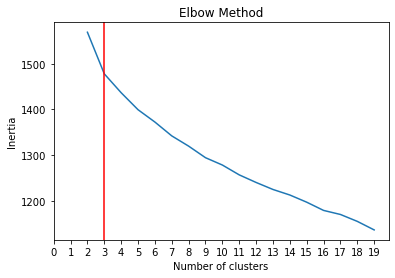

In [39]:
plt.plot(k_range, inertia_arr)

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks([i for i in  range(0,20)])
plt.axvline(3, color='r')
plt.show()

## 3.2 Silhouette Score

In [89]:
# from sklearn.metrics import silhouette_score

# k_range = range(2, 20)
# best_k = -1
# best_silhouette_score = -1

# for k in k_range:
#     Kmeans = KMeans(n_clusters=k, random_state = 200)
#     Kmeans.fit(df_spt2)
#     clusters = Kmeans.predict(df_spt2)
    
#     score = silhouette_score(df_spt2, clusters)
#     print('k: ', k, 'score: ', score)
    
#     if score > best_silhouette_score:
#         best_k = k
#         best_silhouette_score = score
        
# print('best_k: ', best_k, 'best_score: ', best_silhouette_score)

## 4. clustering

In [40]:
Kmeans_ = KMeans(n_clusters=3, random_state = 200)
Kmeans_.fit(df_spt2)

KMeans(n_clusters=3, random_state=200)

In [41]:
cluster = Kmeans_.predict(df_spt2)
cluster

array([0, 0, 1, ..., 0, 0, 0])

In [42]:
df_spt2['cluster'] = cluster
df_spt2

clac_hlv_nm,가구,건강식품,건강용품,건해산물,계절가전,공구/안전용품,과일,과자,구기/필드스포츠,기타(비상품),...,출산/육아용품,침구/수예,커피/차,컴퓨터,테넌트/음식점,패션잡화,퍼스널케어,헬스/피트니스,화장품/뷰티케어,cluster
cust,,,,,,,,,,,,,,,,,,,,,
M000034966,0.000000,0.000000,0.000000,0.009043,0.0,0.0,0.016540,0.024477,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0
M000201112,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.007442,0.000000,0.000005,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0
M000225114,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.013390,0.191302,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.046184,0.004713,0.000000,0.0,0.018674,1
M000261625,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.023256,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.162458,0.000392,0.329706,0.0,0.166908,0
M000350564,0.001818,0.080532,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.166024,0.000000,...,0.0,0.0,0.0,0.0,0.004929,0.045439,0.000000,0.0,0.032260,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M999441814,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.001489,0.000000,0.0,0.000000,0
M999468256,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.017024,0.012500,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.004436,0.000069,0.013372,0.0,0.006995,0
M999492154,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0


In [43]:
df_spt2.value_counts('cluster')

cluster
0    11872
1     3451
2      959
dtype: int64

In [44]:
df_clustered2 = df_spt2.groupby('cluster').sum()
df_clustered2

clac_hlv_nm,가구,건강식품,건강용품,건해산물,계절가전,공구/안전용품,과일,과자,구기/필드스포츠,기타(비상품),...,축산물,출산/육아용품,침구/수예,커피/차,컴퓨터,테넌트/음식점,패션잡화,퍼스널케어,헬스/피트니스,화장품/뷰티케어
cluster,,,,,,,,,,,,,,,,,,,,,
0,17.021733,37.827895,21.117662,53.562587,14.866891,48.138635,62.976129,207.411249,29.316706,92.122758,...,75.584098,18.785212,40.385729,41.609369,51.702089,244.096472,54.043367,72.506193,55.023831,39.158830
1,5.373084,27.298814,11.881185,107.224993,3.340905,87.388567,111.122986,315.255227,9.960187,45.251766,...,142.006636,26.921488,20.591578,55.738323,16.478733,152.949821,18.324710,90.673106,17.798998,16.764075
2,1.080745,10.960027,4.147318,77.110281,0.505255,44.726054,73.695433,142.094347,2.237723,8.301171,...,100.220230,6.032533,5.289049,28.143098,2.001340,37.423823,3.082886,47.075573,4.899532,3.796095


## 5. profiling

In [45]:
df_clustered2.style.background_gradient(cmap='Blues')

clac_hlv_nm,가구,건강식품,건강용품,건해산물,계절가전,공구/안전용품,과일,과자,구기/필드스포츠,기타(비상품),남성의류,냉동식품,냉장/세탁가전,냉장식품,담배,대용식,모바일,문구/사무용품,병통조림,상품권,생활/렌탈서비스,생활/주방가전,서적/음반/악기,세제/위생,속옷/양말/홈웨어,수산물,스포츠패션,시즌스포츠,식기/조리기구,아웃도어/레저,양곡,여성의류,여행/레저서비스,영상/음향가전,완구,원예/애완,유아동의류,유아식품,유제품,음료,인테리어/조명,자동차용품,조리식품,조미료,주류,주방잡화,채소,청소/세탁/욕실용품,축산물,출산/육아용품,침구/수예,커피/차,컴퓨터,테넌트/음식점,패션잡화,퍼스널케어,헬스/피트니스,화장품/뷰티케어
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.021733,37.827895,21.117662,53.562587,14.866891,48.138635,62.976129,207.411249,29.316706,92.122758,65.964894,109.141438,24.862650,159.292060,93.936117,185.079453,54.801223,63.348682,23.674448,19.545455,12.169079,59.421442,21.968675,90.657755,120.525958,101.191424,177.733251,49.303494,46.880299,105.315999,61.009676,103.390379,16.452840,17.504346,123.695033,47.988162,115.683042,17.870217,128.391322,121.959875,7.311006,43.821953,146.682987,152.099069,88.582823,53.372377,140.652482,96.072998,75.584098,18.785212,40.385729,41.609369,51.702089,244.096472,54.043367,72.506193,55.023831,39.158830
1,5.373084,27.298814,11.881185,107.224993,3.340905,87.388567,111.122986,315.255227,9.960187,45.251766,24.316725,224.570726,7.994204,295.069485,26.779540,334.464695,16.712714,84.892700,38.869459,9.988456,5.474167,16.227869,14.302528,194.026817,79.437139,190.082303,67.566596,19.056829,29.696549,43.914616,135.198563,39.947520,6.245926,5.633161,135.087888,65.154882,56.357463,31.382400,271.568677,147.062336,6.331478,62.807738,145.220962,348.259844,100.173208,66.583858,296.314274,182.552923,142.006636,26.921488,20.591578,55.738323,16.478733,152.949821,18.324710,90.673106,17.798998,16.764075
2,1.080745,10.960027,4.147318,77.110281,0.505255,44.726054,73.695433,142.094347,2.237723,8.301171,4.624149,151.931193,1.072307,203.074237,5.628187,203.950132,1.171959,41.935584,25.756267,1.483405,0.650292,4.134992,3.280017,154.050488,24.436321,141.777313,13.365769,4.391933,9.499367,10.516923,113.740912,9.745419,1.024691,1.157561,25.215120,27.689044,9.365390,5.939562,187.421195,72.107916,2.632498,19.069362,45.150509,289.330878,43.193308,32.402675,255.675486,83.527276,100.220230,6.032533,5.289049,28.143098,2.001340,37.423823,3.082886,47.075573,4.899532,3.796095


In [46]:
df_clustered.style.background_gradient(cmap='Blues')

clac_hlv_nm,가구,건강식품,건강용품,건해산물,계절가전,공구/안전용품,과일,과자,구기/필드스포츠,기타(비상품),남성의류,냉동식품,냉장/세탁가전,냉장식품,담배,대용식,모바일,문구/사무용품,병통조림,상품권,생활/렌탈서비스,생활/주방가전,서적/음반/악기,세제/위생,속옷/양말/홈웨어,수산물,스포츠패션,시즌스포츠,식기/조리기구,아웃도어/레저,양곡,여성의류,여행/레저서비스,영상/음향가전,완구,원예/애완,유아동의류,유아식품,유제품,음료,인테리어/조명,자동차용품,조리식품,조미료,주류,주방잡화,채소,청소/세탁/욕실용품,축산물,출산/육아용품,침구/수예,커피/차,컴퓨터,테넌트/음식점,패션잡화,퍼스널케어,헬스/피트니스,화장품/뷰티케어
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,22.161298,46.249676,10.580682,30.448023,10.160501,17.482805,59.504377,126.604179,20.083103,72.113594,62.182538,90.400150,12.981442,105.591283,25.625860,148.167894,61.909052,26.214639,12.178415,27.632048,6.367146,28.471805,19.847234,78.209710,48.089290,67.198321,89.316069,40.499960,37.271645,82.739596,35.407357,64.142565,24.245347,14.600275,42.185163,20.629518,106.015999,10.218726,78.153692,76.873223,19.286590,45.139733,80.633446,87.667074,78.737016,57.347338,82.718209,43.372344,36.328173,27.792076,28.310405,24.855256,31.736632,195.213433,43.409437,51.523855,30.820831,46.047493
1,3.842242,16.778992,2.012126,61.041648,1.286824,16.865379,107.884470,150.223778,2.795905,11.678391,11.076412,203.154975,1.822786,206.169966,4.494080,282.276892,6.336414,25.140683,25.643315,1.421130,2.733972,5.755935,5.516852,159.176952,18.920005,122.728801,16.747226,6.683186,14.276320,12.977042,79.805675,10.804198,1.810947,1.498709,19.034133,13.528270,14.346766,9.680000,162.070648,83.489402,11.574970,30.873297,56.005080,215.046337,65.835598,58.485340,203.305704,37.726067,66.333505,11.672640,7.065972,25.848247,3.220628,50.561555,5.453906,38.100296,5.681513,7.730431
2,9.771587,40.802168,5.069074,68.240079,3.928730,20.792696,127.504335,213.277835,10.176310,49.164436,37.354284,200.896365,4.881496,224.069023,15.128019,335.983265,16.980900,34.653219,22.720353,7.487685,5.101427,13.097863,14.299644,164.809971,40.848198,143.987578,45.501729,30.360459,33.941932,42.412769,86.635839,36.909498,14.656632,5.959125,40.066705,21.017295,58.246597,14.832828,188.959006,109.858297,15.876323,56.018061,95.115648,213.154086,107.754124,91.156559,205.228645,56.818512,76.303325,26.068595,21.717220,40.941503,11.367316,170.140530,22.367151,61.348281,13.356540,23.541488
